In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

0

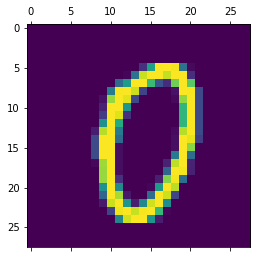

In [2]:
%matplotlib inline
plt.matshow(x_train[1000])
y_train[1000]

In [3]:
x_train = x_train.reshape(-1, 28*28)
x_train = np.true_divide(x_train, 255.0)
x_test = x_test.reshape(-1, 28*28)
x_train.shape, x_test.shape,

((60000, 784), (10000, 784))

In [4]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [5]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [6]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2711 - accuracy: 0.9230
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1253 - accuracy: 0.9632
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0887 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0671 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0533 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0440 - accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0354 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0249 - accuracy: 0.9919
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.019

In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 16.8704 - accuracy: 0.9780


[16.870431900024414, 0.9779999852180481]

In [8]:
y_predict = model.predict(x_test)
y_predict = [np.argmax(i) for i in y_predict]

In [9]:
y_predict[:10], y_test[:10]

([3, 2, 1, 0, 4, 1, 4, 3, 5, 4],
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [10]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predict)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 979,    0,    0,    0,    0,    0,    0,    0,    1,    0],
       [   2, 1132,    0,    1,    0,    0,    0,    0,    0,    0],
       [  36,  188,  807,    1,    0,    0,    0,    0,    0,    0],
       [   1,   22,   90,  895,    0,    1,    0,    0,    0,    1],
       [  27,   20,   43,   10,  881,    0,    0,    1,    0,    0],
       [  25,    1,    3,  372,    3,  485,    0,    1,    1,    1],
       [ 160,   10,  107,    5,  160,  179,  337,    0,    0,    0],
       [  11,   79,  249,  281,   13,    5,    0,  390,    0,    0],
       [  55,   24,  173,  260,   14,   39,   21,   12,  376,    0],
       [  32,   12,    5,  101,  353,   17,    0,  263,   47,  179]])>

Text(69.0, 0.5, 'Truth')

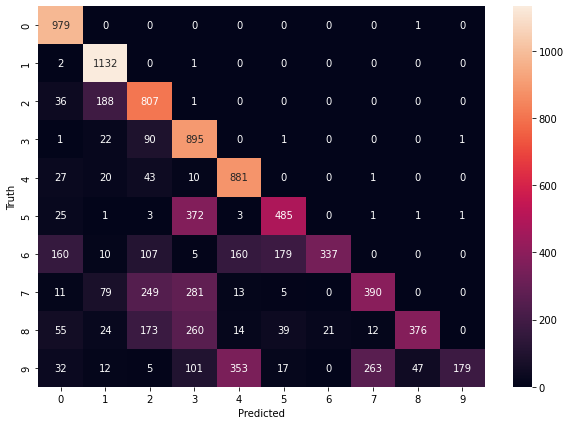

In [11]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')